<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Renewable-Energy-Project/blob/main/Linear_Regression_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/Renewable-Energy-Project.git

Cloning into 'Renewable-Energy-Project'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 112 (delta 15), reused 6 (delta 6), pack-reused 84
Receiving objects: 100% (112/112), 869.40 KiB | 31.05 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import csv
from scipy import stats

In [3]:
df = pd.read_csv("/content/Renewable-Energy-Project/Data/World_1980_2021.csv", index_col= 'Unnamed: 0')
df = df.astype(float)

In [4]:
df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Production (terajoules),312657821.1,307331192.6,306101458.5,309181710.0,325956217.4,333917295.7,344761698.2,352809382.5,366553888.8,373528265.8,...,575634903.1,584231928.7,594215776.4,599601268.3,595571140.1,610955925.6,633737110.0,644767403.2,618353912.6,640225404.7
Consumption (terajoules),309067972.2,305397473.1,305700939.5,309915449.3,324211210.0,332849280.9,339971237.5,351085633.0,364597401.6,370738739.5,...,582212267.7,592609131.6,597832462.6,597353592.1,605235813.4,616863351.2,631472593.3,634029840.1,606522268.4,637327580.5


In [5]:
Y_cons = np.array(df[df.index == 'Consumption (terajoules)']) * 10**12 * (2.7777 * (10**-16))
Y_Prod = np.array(df[df.index == 'Production (terajoules)']) * 10**12 * (2.7777 * (10**-16))
X_year = np.array(df.columns )

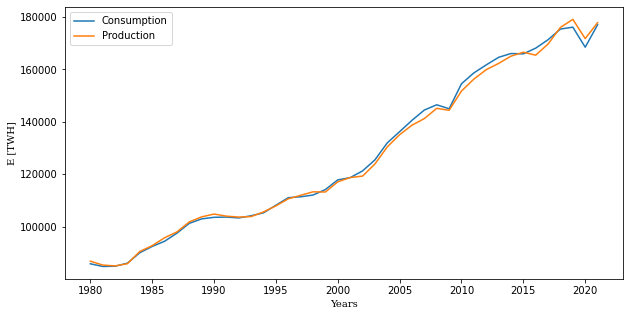

In [6]:
fig,axe = plt.subplots(1,1,figsize = (10, 5))

axe.plot(X_year,Y_cons.reshape(-1),label= 'Consumption')
axe.plot(X_year,Y_Prod.reshape(-1),label= 'Production')
#axe.set_title("Energy consumption and production \n in the world from 1980 to 2021" , fontname = 'serif')
axe.set_xlabel('Years', fontname = 'serif')
axe.set_ylabel('E [TWH]', fontname = 'serif')
axe.set_xticks(X_year[::5])
plt.legend()
#plt.savefig('energy_consume_production.png',dpi=2000)

## Regression

In [7]:
df = pd.read_csv("/content/Renewable-Energy-Project/Data/Energy_consumption_(OWD).csv")

In [8]:
X_year = np.array(df[df['Code'] == 'OWID_WRL']['Year'])

In [10]:
Y_cons = np.array(df[df['Code'] == 'OWID_WRL'].transpose().iloc[3:].sum())

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_year.reshape(-1, 1), Y_cons.reshape(-1, 1) , test_size=0.5)

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit( X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [13]:
from matplotlib.lines import MarkerStyle
# The coefficients
print("Coefficients: %f " % regr.coef_)
# The intercept
print("intercept: %f " % regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 2079.945843 
intercept: -4043064.369243 
Mean squared error: 19230661.09
Coefficient of determination: 0.98


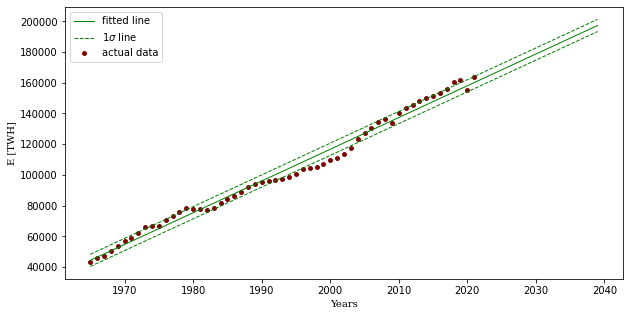

In [ ]:
fig,axe = plt.subplots(1,1,figsize = (10, 5))
# Plot outputs
axe.scatter(X_train, y_train, color="maroon" , s = 15 , label= "actual data" )
axe.scatter(X_test, y_test, color="maroon" , s = 15 )

X_future = np.array([range(1965,2040,1)]).reshape(-1,1)
y_future = regr.predict(X_future)
sigma = np.sqrt(np.var(y_future[0:len(Y_cons.reshape(-1))].reshape(-1) - Y_cons.reshape(-1)))

axe.plot(X_future , y_future , color="green", linewidth=1 , label = "fitted line")
axe.plot(X_future , y_future - sigma , color="green", linewidth=1,  linestyle='dashed' , label = '1$\sigma$ line'  )
axe.plot(X_future , y_future + sigma , color="green", linewidth=1,  linestyle='dashed' )


#axe.set_title("Energy consumption in the world from 1965 to 2021 \n and a fitted regression line with its 1$\sigma$ lines" , fontname = 'serif')
axe.set_xlabel('Years', fontname = 'serif')
axe.set_ylabel('E [TWH]', fontname = 'serif')
plt.legend()

plt.savefig('consume_Energy_LR.png',dpi=2000)